# 생활폐기물 배출량(톤/일) 예측
<!-- # Predicting the NBA Awards with Machine Learning -->

<!-- The goal of this analysis is to predict the [NBA Awards](https://www.basketball-reference.com/awards/) for a specific year by applying machine learning algorithms on player performance data and award voting data from other years. NBA Awards considered in this analysis are:
- [NBA Most Valuable Player](https://www.basketball-reference.com/awards/mvp.html) (MVP)
- [NBA Rookie of the Year](https://www.basketball-reference.com/awards/roy.html) (ROY) 
- [NBA Defensive Player of the Year](https://www.basketball-reference.com/awards/dpoy.html) (DPOY) 
- [NBA Sixth Man of the Year](https://www.basketball-reference.com/awards/smoy.html) (SMOY) 

The analysis is based on the [Scikit-learn](http://scikit-learn.org) machine learning package, NBA data are taken from [basketball-reference.com](https://www.basketball-reference.com).

## Import modules and libraries: -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor, PassiveAggressiveRegressor
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import validation_curve, LeaveOneGroupOut, GridSearchCV
from sklearn.metrics import explained_variance_score, median_absolute_error, mean_absolute_error 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

import seaborn as sns

In [2]:
first_year = 2015 # Test data의 첫 번째 year
last_year = 2018 # Test data의 마지막 year
test_year = 2018 # Train set의 year

print("-> Test year = {} ".format(test_year))
 
train_years = list(range(first_year, last_year+1))

train_years.remove(test_year)
first_train_year = train_years[0]
last_train_year  = train_years[-1]
    
print("-> Train years = {}-{}".format(first_train_year, last_train_year))

-> Test year = 2018 
-> Train years = 2015-2017


## Data processing



In [3]:
df_train = pd.read_csv("C:/Users/chaepacass/Desktop/졸플 쓰레기 수요 조사/서울시 주민 1인당 생활폐기물 2015-2017.csv",encoding='cp949')
df_test = pd.read_csv("C:/Users/chaepacass/Desktop/서울시 주민 1인당 생활폐기물 2018.CSV",encoding='cp949')
    
# elif a==2019:
#     df_train = pd.read_csv("C:/Users/chaepacass/Desktop/졸플 쓰레기 수요 조사/merge.csv",encoding='cp949')
#     df_test = pd.read_csv("C:/Users/chaepacass/Desktop/서울시 주민 1인당 생활폐기물 2019.CSV",encoding='cp949')
    

In [4]:
print("-> {}  목록:".format(test_year))

df_tmp = df_test[df_test['주민수(명)'] > 0 ]

display(df_tmp)

print(df_tmp.columns)

-> 2018  목록:


,기간,지역,주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일),생활폐기물 배출량(톤/일),주민수(명),일반가구수,1인가구수,2인가구수,3인가구수,4인가구수,...,7인 이상,65세이상 고령자,제조업,숙박 및 음식점,면적,건설업,도매 및 소매업,운수업,총 사업체 수,생활폐기물 재활용량
0,2018,종로구,2.22,128.0,163026,63773,25326,15957,11241,8286,...,162,26742,4437,6625,23.91,328,16587,1388,39952,133.9
1,2018,중구,3.17,188.2,135633,53102,20803,14101,9601,6463,...,110,22005,9369,6050,9.96,390,31547,1547,60957,126.7
2,2018,용산구,1.18,95.4,245090,92500,34240,24574,17717,12098,...,171,37640,964,4603,21.87,421,7248,1251,20813,118.9
3,2018,성동구,0.85,91.1,316463,123963,40706,32135,26002,19548,...,264,42767,4444,3836,16.86,666,7385,2629,27868,94.7
4,2018,광진구,0.92,79.2,371063,148735,56337,35093,28596,22354,...,329,45619,1707,4764,17.06,784,5889,2519,24535,168.2
5,2018,동대문구,1.14,110.4,364338,146974,55593,35628,27612,21139,...,340,57165,3297,4863,14.22,766,10923,3617,31878,208.3
6,2018,중랑구,0.96,110.2,408147,159444,49207,42934,34055,25381,...,355,61830,3384,4152,18.50,912,5296,6550,28024,192.9
7,2018,성북구,0.78,98.7,447687,171943,55136,42140,36301,29176,...,458,67782,2214,4463,24.57,554,4805,3080,23287,155.8
8,2018,강북구,0.71,75.2,322915,127551,40872,34781,26543,19222,...,308,58196,1444,3719,23.60,506,3768,3218,18918,79.5
9,2018,도봉구,0.75,67.6,341649,126286,30848,35343,30077,23237,...,343,55964,1020,2751,20.67,495,3455,5099,18894,109.8


Index(['기간', '지역', '주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)', '생활폐기물 배출량(톤/일)', '주민수(명)',
       '일반가구수', '1인가구수', '2인가구수', '3인가구수', '4인가구수', '5인가구수', '6인가구수 ', '7인 이상',
       '65세이상 고령자', '제조업', '숙박 및 음식점', '면적', '건설업', '도매 및 소매업', '운수업',
       '총 사업체 수', '생활폐기물 재활용량'],
      dtype='object')


## NaN handling (데이터 전처리)

In [5]:
print("NaNs 값 전처리 전")
print("-> train set에서 NaNs 값을 가지는 데이터 수 =", df_train.shape[0] - df_train.dropna().shape[0])
print("-> test set에서 NaNs 값을 가지는 데이터 수 =", df_test .shape[0] - df_test .dropna().shape[0])
print("")


df_train[['주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)', '생활폐기물 배출량(톤/일)', '주민수(명)', '일반가구수', '1인가구수', '2인가구수', '3인가구수', '4인가구수','5인가구수','6인가구수 ','7인 이상']] = \
df_train[['주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)', '생활폐기물 배출량(톤/일)', '주민수(명)', '일반가구수', '1인가구수', '2인가구수', '3인가구수', '4인가구수','5인가구수','6인가구수 ','7인 이상']].fillna(value=0.5)
df_test [['주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)', '생활폐기물 배출량(톤/일)', '주민수(명)', '일반가구수', '1인가구수', '2인가구수', '3인가구수', '4인가구수','5인가구수','6인가구수 ','7인 이상']] = \
df_test [['주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)', '생활폐기물 배출량(톤/일)', '주민수(명)', '일반가구수', '1인가구수', '2인가구수', '3인가구수', '4인가구수','5인가구수','6인가구수 ','7인 이상']].fillna(value=0.5)

print("NaNs 값 전처리 후")
print("-> train set에서 NaNs 값을 가지는 데이터 수 =", df_train.shape[0] - df_train.dropna().shape[0])
print("-> test set에서 NaNs 값을 가지는 데이터 수 =", df_test .shape[0] - df_test.dropna().shape[0])
print("")
    


NaNs 값 전처리 전
-> train set에서 NaNs 값을 가지는 데이터 수 = 0
-> test set에서 NaNs 값을 가지는 데이터 수 = 0

NaNs 값 전처리 후
-> train set에서 NaNs 값을 가지는 데이터 수 = 0
-> test set에서 NaNs 값을 가지는 데이터 수 = 0



## Feature Matrix(X)와 Target Vector(y) dataframes 생성
- df_train을 X_train, y_train 으로 분리
- df_test을 X_test, y_test으로 분리

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from c

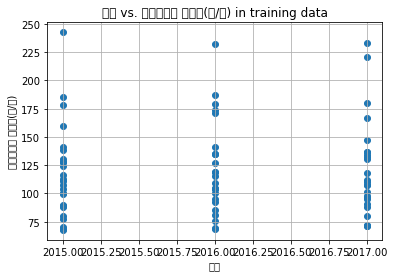

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from c

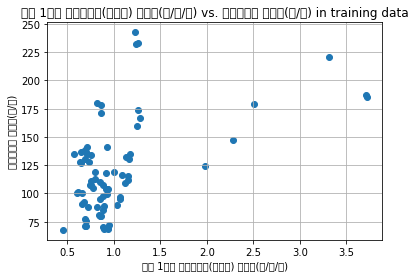

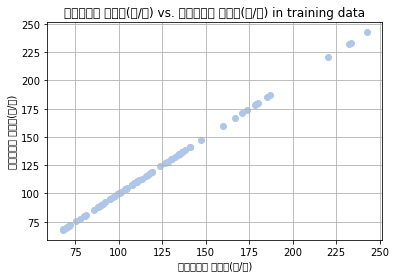

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)


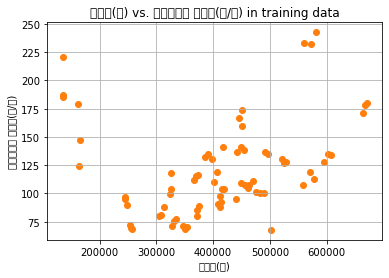

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from curre

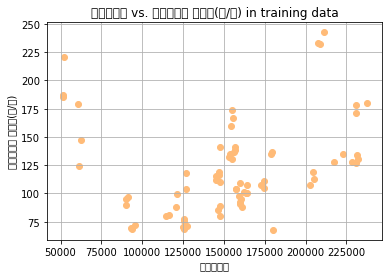

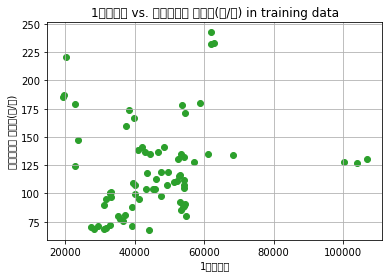

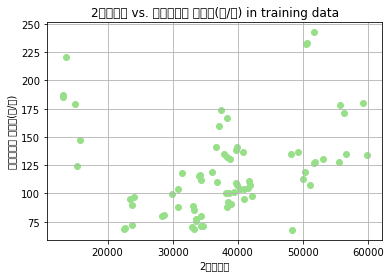

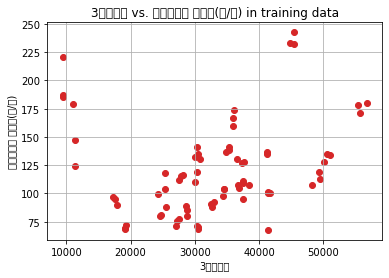

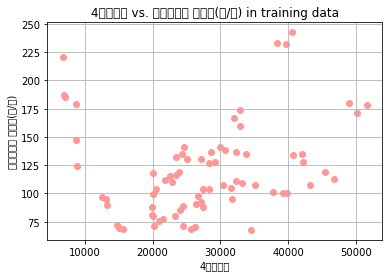

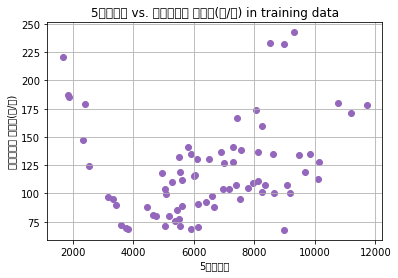

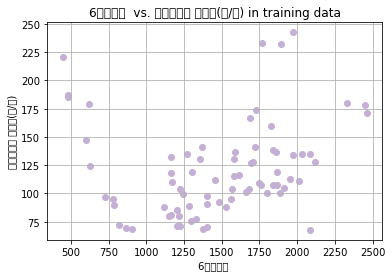

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)


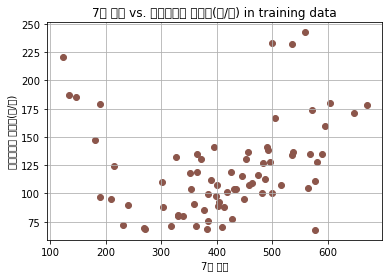

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from cur

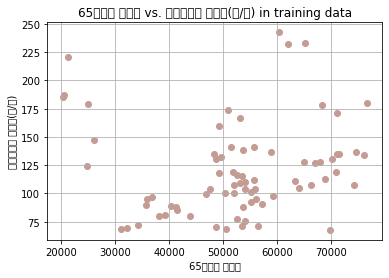

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50629 missing from curre

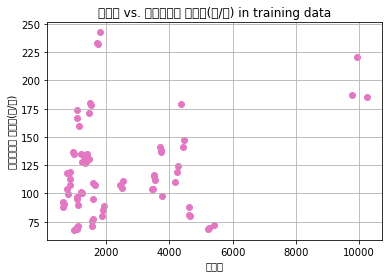

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from c

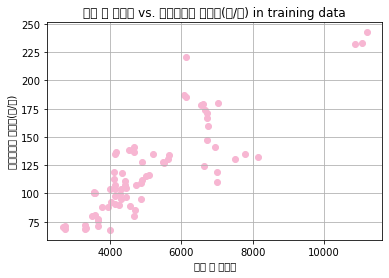

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)


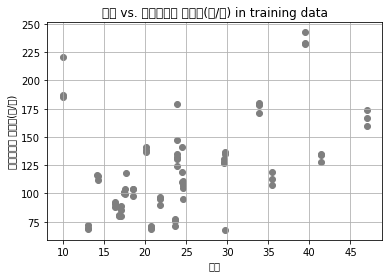

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0, flags=flags)


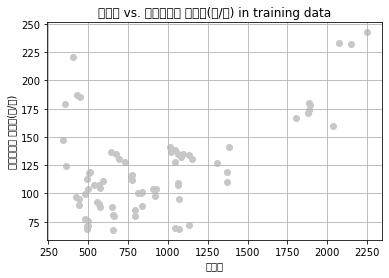

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49548 missing from curre

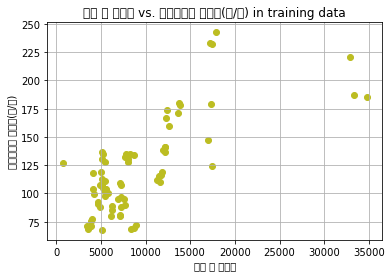

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)


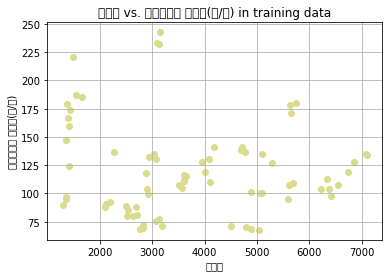

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52404 missing from curre

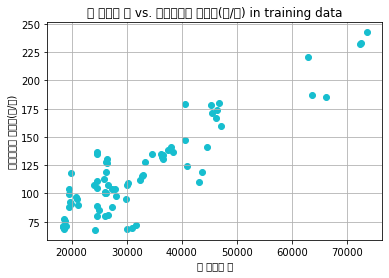

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)


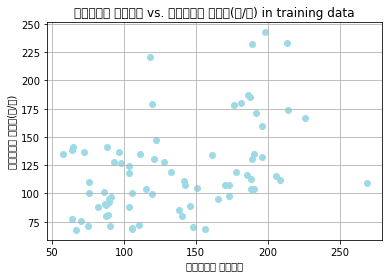

In [6]:
color=iter(plt.cm.tab20(np.linspace(0, 1, len(df_train.columns)))) # matplotlib 산점도에서 각 계열에 대해 다른 색상 설정

for ifeature, feature in enumerate(df_train.columns):
    if ifeature == 1:
        continue
        
    plt.title("{} vs. 생활폐기물 배출량(톤/일) in training data".format(feature))
    plt.xlabel(feature)
    plt.ylabel('생활폐기물 배출량(톤/일)')
    plt.scatter(df_train[feature], df_train['생활폐기물 배출량(톤/일)'], color=next(color))
    plt.grid(True)
    plt.show()

In [7]:
corr = df_train.corr(method = 'pearson')
print(corr)

                                    기간  주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)  \
기간                            1.000000                     -0.008469   
주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일) -0.008469                      1.000000   
생활폐기물 배출량(톤/일)                0.040037                      0.517691   
주민수(명)                       -0.022078                     -0.595500   
일반가구수                         0.010077                     -0.602711   
1인가구수                         0.064768                     -0.434766   
2인가구수                         0.038484                     -0.618689   
3인가구수                        -0.005554                     -0.591095   
4인가구수                        -0.060247                     -0.544205   
5인가구수                        -0.102086                     -0.564937   
6인가구수                        -0.136077                     -0.595415   
7인 이상                        -0.176569                     -0.581559   
65세이상 고령자                     0.115061                     -0.66

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49444 missing from current fon

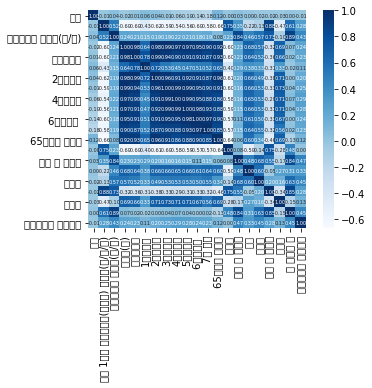

In [8]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 5}, fmt = '.2f', square = True, cmap = 'Blues')



In [9]:
# # Feature Matrix dataframe:
# # 행이 아닌 열을 삭제하는 것이므로 axis = 1
X_train = df_train.drop(['생활폐기물 배출량(톤/일)', '기간','면적'], axis=1)
X_test  = df_test .drop(['생활폐기물 배출량(톤/일)', '기간','면적'], axis=1)
X_list = [X_train, X_test]

for X in X_list:
    X.drop(['지역','운수업','1인가구수','65세이상 고령자','제조업'], axis=1, inplace=True)

    
# Target Vector dataframe: 
y_train = df_train['생활폐기물 배출량(톤/일)'] # target: AVS
y_test = df_test ['생활폐기물 배출량(톤/일)']

n_data_train = X_train.shape[0]
n_data_test = X_test .shape[0]

n_features = X_train.shape[1]
feature_names = X_train.columns

print("-> Train data set : data 수 = {:4}, feature 수 = {}".format(n_data_train, n_features))
print("-> Test data set : data 수 = {:4}, feature 수 = {}".format(n_data_test,  n_features))
print("")
print("-> Model feature 수 : ", end = '') # 모델에 쓰일 feature

for i in feature_names:
    print(i, end=', ')

-> Train data set : data 수 =   75, feature 수 = 14
-> Test data set : data 수 =   25, feature 수 = 14

-> Model feature 수 : 주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일), 주민수(명), 일반가구수, 2인가구수, 3인가구수, 4인가구수, 5인가구수, 6인가구수 , 7인 이상, 숙박 및 음식점, 건설업, 도매 및 소매업, 총 사업체 수, 생활폐기물 재활용량, 

## Training data에서 생활폐기물 배출량(톤/일)와 다른 feature 사이의 관계 분석

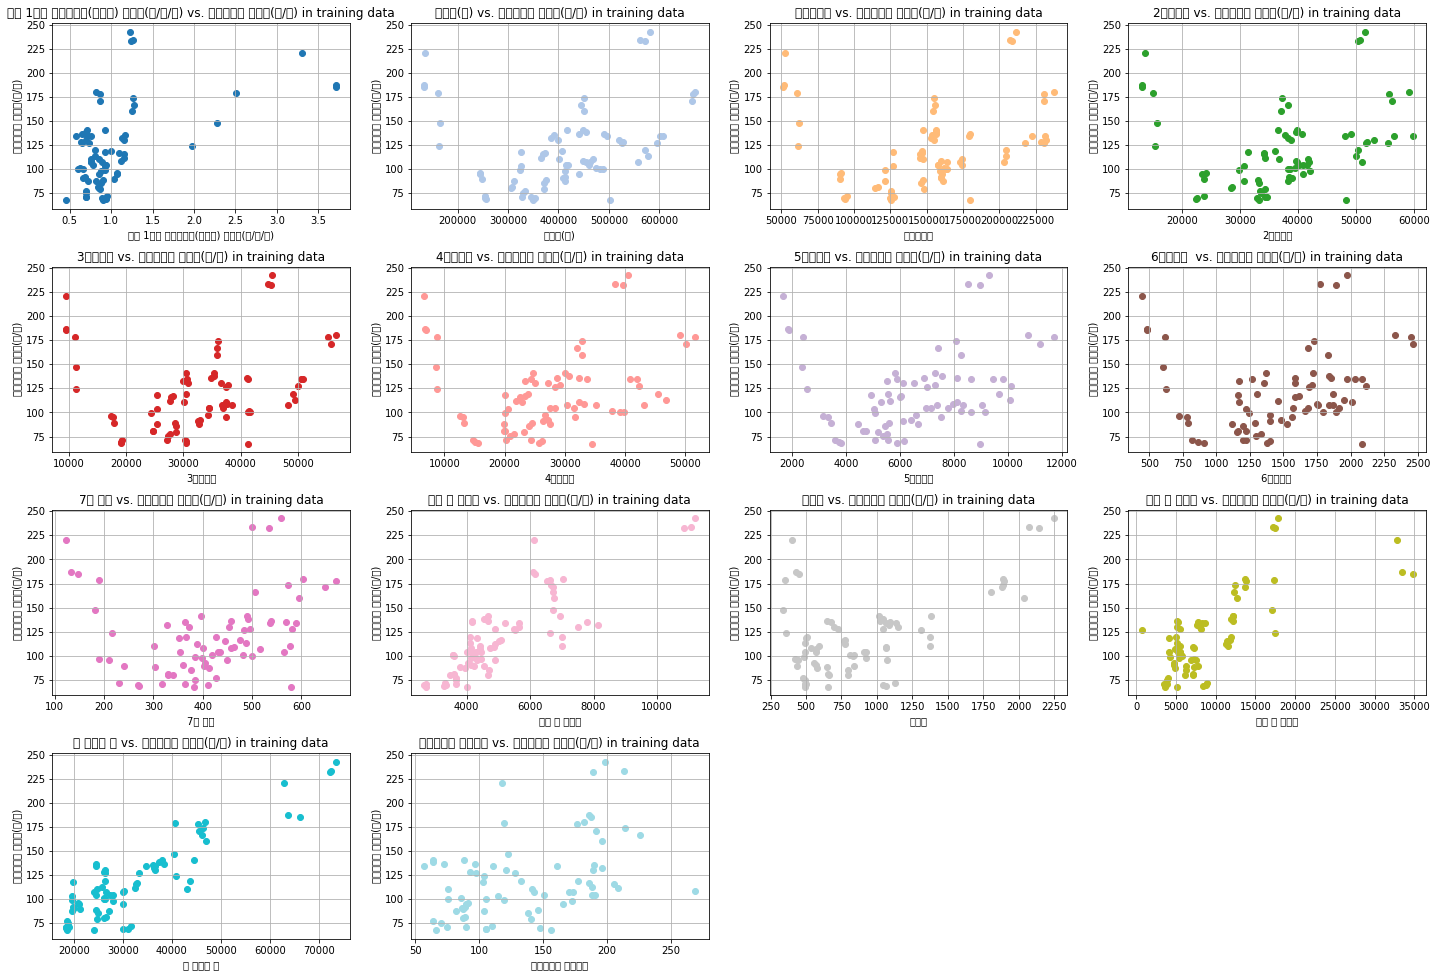

In [10]:
color=iter(plt.cm.tab20(np.linspace(0, 1, len(X_train.columns)))) # matplotlib 산점도에서 각 계열에 대해 다른 색상 설정

plt.figure(figsize=(20, 20))

for ifeature, feature in enumerate(X_train.columns):
    plt.subplot(6, 4, ifeature+1)

   

    plt.title("{} vs. 생활폐기물 배출량(톤/일) in training data".format(feature))
    plt.xlabel(feature)
    plt.ylabel('생활폐기물 배출량(톤/일)')
    plt.scatter(X_train[feature], y_train, color=next(color))
    plt.grid(True)
    plt.tight_layout()

## Normalization (정규화)

In [11]:
feature_names = X_train.columns # 더이상 유효하지 않다 -> scale할 것이므로

# RobustScaler() : 특이 값이 들어있는 데이터의 표준화
# 중앙값(median)과 IQR(Inter-Quartile Range)을 이용해서 척도를 표준화하는 방법

X_scaler = StandardScaler(with_mean=True, with_std=True)
# X_scaler = MinMaxScaler()
# X_scaler = RobustScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

## Supervised Learning: Regression
### 회귀모형 정의

In [12]:
class MyModel:
    def __init__(self, estimator_name, estimator):

        self.estimator_name = estimator_name
        self.estimator      = estimator

        self.cv_r2 = []
        self.test_r2 = []
        self.MSLE = []
        self.cv_importances = []
        self.cv_coefficients = []
        self.cv_y_test = []
        self.cv_y_score = []

    def reset(self):
        self.cv_r2[:] = []
        self.test_r2[:] = []
        self.MSLE[:] = []
        self.cv_importances[:] = []
        self.cv_coefficients[:] = []
        self.cv_y_test[:] = []
        self.cv_y_score[:] = []

    def set_y_truth(self, y_truth):
        self.y_truth = y_truth

    def set_y_prediction(self, y_prediction):
        self.y_prediction = y_prediction
        
    def set_y_score(self, y_score):
        self.y_score = y_score

In [13]:
def myDNN(optimizer='adam',
          loss='binary_crossentropy', 
          act_hidden='relu',
          init='glorot_uniform', 
          n_input=1,
          n_nodes=100,
          l1_alpha=0,
          l2_alpha=0,
          do_rate=0):
    
    # 모델 정의:
    model = Sequential()
    model.add(Dense(n_nodes, 
                    activation = act_hidden,
                    kernel_initializer = init, 
                    kernel_regularizer = regularizers.l1_l2(l1_alpha, l2_alpha),
                    bias_regularizer = regularizers.l1_l2(l1_alpha, l2_alpha),
                    activity_regularizer = regularizers.l1_l2(l1_alpha, l2_alpha),
                    input_dim = n_input))

    model.add(Dense(n_nodes, 
                    activation = act_hidden,
                    kernel_initializer = init, 
                    kernel_regularizer = regularizers.l1_l2(l1_alpha, l2_alpha),
                    bias_regularizer = regularizers.l1_l2(l1_alpha, l2_alpha),
                    activity_regularizer = regularizers.l1_l2(l1_alpha, l2_alpha)))

    model.add(Dense(1, kernel_initializer=init, activation='sigmoid')) # 활성화 함수로 sigmoid 함수 사용
    
    model.compile(optimizer=optimizer, loss=loss)
    
    return model

In [14]:
rseed = 666
models = []

estimator_name = 'K-Nearest Neighbours Regressor'
n_n = 5
w   = 'uniform' # 'distance'
estimator = KNeighborsRegressor(n_neighbors=n_n, weights=w)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Ridge Regressor'
a = 0.1 # regularization factor (높은 alpha 값 -> 강한 정규화)
estimator = Ridge(alpha=a, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Lasso Regressor'
a = 1e-05
estimator = Lasso(alpha=a, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'ElasticNet Regressor'
a = 1e-04
l_r = 0.5
estimator = ElasticNet(alpha=a, l1_ratio=l_r, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Support Vector Machine Regressor'
C = 0.1
e = 0.1
k = 'poly' # 'linear'
d = 3
estimator = SVR(C=C, epsilon=e, kernel=k, degree=d, cache_size=4000)
l = 'epsilon_insensitive' # i.e. l1 regularizarion -> Sparsity
l = 'squared_epsilon_insensitive' # i.e. l2 regularizarion -> Shrinkage 
# estimator = LinearSVR(C=C, loss=l, dual=False, random_state=rseed)
# models.append(MyModel(estimator_name, estimator))

estimator_name = 'Stochastic Gradient Descent Regressor'
l = 'squared_loss' # 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'
p = 'l2' # 'l1', 'elasticnet'
a = 0.01
l_r = 0.15 
estimator = SGDRegressor(loss=l, penalty=p, alpha=a, l1_ratio=l_r, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Passive Aggressive Regressor'
C = 0.001
l = 'epsilon_insensitive'
e = 0.1
estimator = PassiveAggressiveRegressor(C=C, loss=l, epsilon=e, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Neural Network Regressor'
a = 1.0 # l2 regularization factor
# estimator = MLPRegressor(alpha=a, activation='sigmoid', solver='adam', random_state=rseed)
estimator = MLPRegressor(alpha=a, activation='relu', solver='adam', random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Deep Neural Network Regressor'
l2_a = 0.00001
e = 1000#100
b = 10#20#10
estimator = KerasRegressor(build_fn=myDNN, n_input=n_features, l2_alpha=l2_a,
                           verbose=0, epochs=e, batch_size=b)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Gaussian Process Regressor'
estimator = GaussianProcessRegressor(random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Decision Tree Regressor'
m_d = None   # nodes are expanded until leafs are pure 
m_f = 'auto' # The number of features to consider when looking for the best split, auto' => max_features=n_features 
estimator = DecisionTreeRegressor(max_depth=m_d, max_features=m_f, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Random Forest Regressor'
n_e = 100
m_d = None
m_f = 'auto'
estimator = RandomForestRegressor(n_estimators=n_e, max_depth=m_d, max_features=m_f, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Extra Randomized Trees Regressor'
n_e = 100
m_d = None
m_f = 'auto'
estimator = ExtraTreesRegressor(n_estimators=n_e, max_depth=m_d, max_features=m_f, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Adaptive Boosted Decision Tree Regressor'
n_e = 100
l_r = 0.1
estimator = AdaBoostRegressor(n_estimators=n_e, learning_rate=l_r, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Gradient Boosted Decision Tree Regressor'
n_e = 100
m_d = 3
l_r = 0.1
estimator = GradientBoostingRegressor(n_estimators=n_e, max_depth=m_d, learning_rate=l_r, random_state=rseed)
models.append(MyModel(estimator_name, estimator))

estimator_name = 'Extreme Gradient Boosted Decision Tree Regressor'
n_e = 100
m_d = 3
l_r = 0.1
# estimator = XGBRegressor(n_estimators=n_e, max_depth=m_d, learning_rate=l_r, random_state=rseed)
# models.append(MyModel(estimator_name, estimator))

print("-> 사용할 회귀분석 기법:")
print("")

model_names = []

for counter, model in enumerate(models, 0):
    print("{:2} : {}".format(counter, model.estimator_name))
    #print("     Model parameters : ", mymodel.estimator.get_params())
    model_names.append(model.estimator_name)

-> 사용할 회귀분석 기법:

 0 : K-Nearest Neighbours Regressor
 1 : Ridge Regressor
 2 : Lasso Regressor
 3 : ElasticNet Regressor
 4 : Stochastic Gradient Descent Regressor
 5 : Passive Aggressive Regressor
 6 : Neural Network Regressor
 7 : Deep Neural Network Regressor
 8 : Gaussian Process Regressor
 9 : Decision Tree Regressor
10 : Random Forest Regressor
11 : Extra Randomized Trees Regressor
12 : Adaptive Boosted Decision Tree Regressor
13 : Gradient Boosted Decision Tree Regressor


## 교차 검증

- Training data 교차검증을 위해 *LeaveOneGroupOut* 기법을 사용한다
- Group은 YEAR

In [15]:
logo = LeaveOneGroupOut()
cv_groups = df_train['기간'] 

교차 검증을 통한 regressor 적합도 분석

-> Cross validating(교차 검증) K-Nearest Neighbours Regressor ...
-> Cross validating(교차 검증) Ridge Regressor ...
-> Cross validating(교차 검증) Lasso Regressor ...
-> Cross validating(교차 검증) ElasticNet Regressor ...


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from c

-> Cross validating(교차 검증) Stochastic Gradient Descent Regressor ...
-> Cross validating(교차 검증) Passive Aggressive Regressor ...
-> Cross validating(교차 검증) Neural Network Regressor ...


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from c

-> Cross validating(교차 검증) Deep Neural Network Regressor ...


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from c

-> Cross validating(교차 검증) Gaussian Process Regressor ...
-> Cross validating(교차 검증) Decision Tree Regressor ...
-> Cross validating(교차 검증) Random Forest Regressor ...
-> Cross validating(교차 검증) Extra Randomized Trees Regressor ...
-> Cross validating(교차 검증) Adaptive Boosted Decision Tree Regressor ...


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from c

-> Cross validating(교차 검증) Gradient Boosted Decision Tree Regressor ...


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48176 missing from current fon

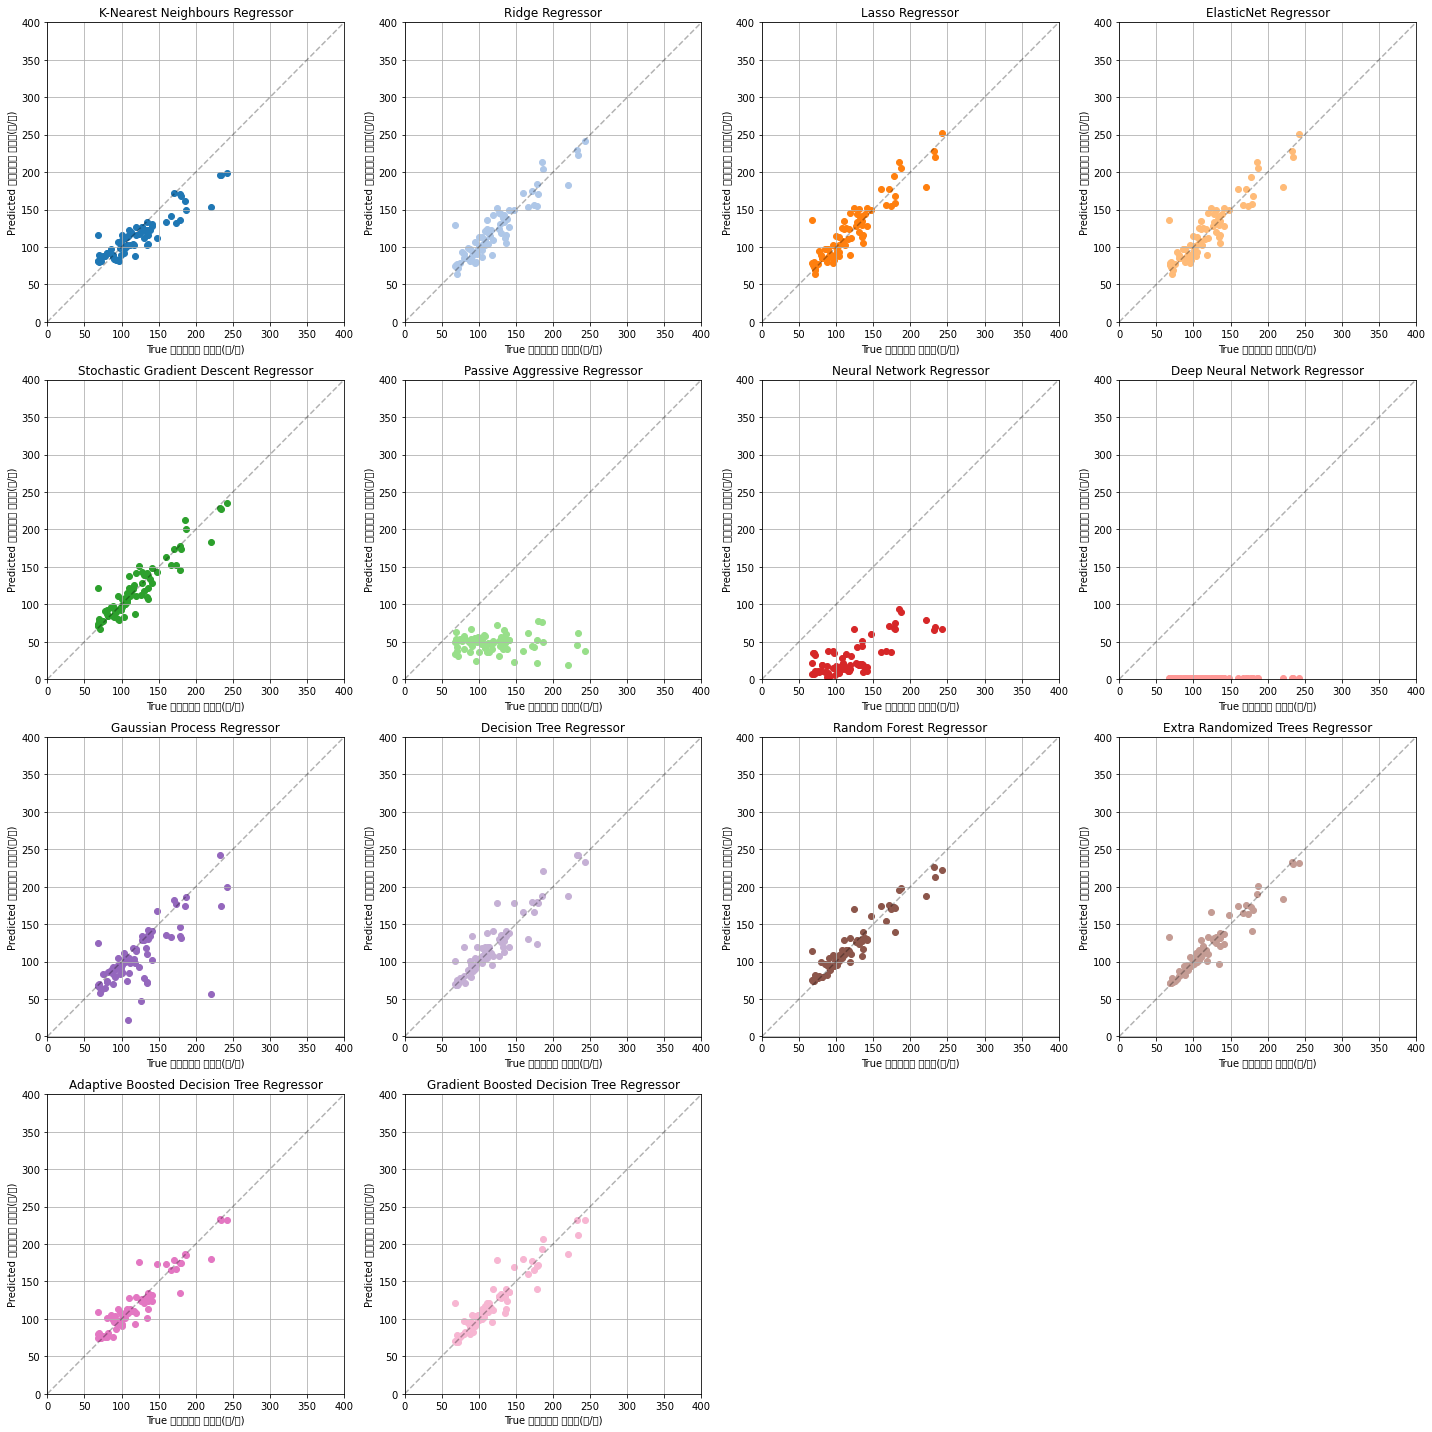


-> 회귀모형분석 표:


,Estimator,R2 score,Explained variance score
0,K-Nearest Neighbours Regressor,0.767,0.794
1,Ridge Regressor,0.866,0.867
2,Lasso Regressor,0.849,0.851
3,ElasticNet Regressor,0.850,0.852
4,Stochastic Gradient Descent Regressor,0.875,0.875
5,Passive Aggressive Regressor,-3.243,-0.087
6,Neural Network Regressor,-4.662,0.516
7,Deep Neural Network Regressor,-8.609,0.000
8,Gaussian Process Regressor,0.389,0.512
9,Decision Tree Regressor,0.831,0.832


In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)

logo = LeaveOneGroupOut()
cv_groups = df_train['기간']

cv_metrics = []

color=iter(plt.cm.tab20(np.linspace(0, 1, 20)))    
plt.figure(figsize=(20, 20))

for imodel, model in enumerate(models):
    
    model.reset()
    
    regressor      = model.estimator
    regressor_name = model.estimator_name
    
    cv_y_predictions = []
    cv_y_truths      = []
    cv_importances   = []
    
    print("-> Cross validating(교차 검증)", regressor_name, "...")
    
    for train_index, test_index in logo.split(X_train, y_train, groups=cv_groups):

        X_cvtrain = X_train[train_index]
        X_cvtest  = X_train[test_index]
        y_cvtrain = y_train[train_index]
        y_cvtest  = y_train[test_index]
                       
        regressor.fit(X_cvtrain, y_cvtrain)
    
        y_cvprediction = regressor.predict(X_cvtest) 
        y_cvtruth      = y_cvtest.tolist()
             
        cv_y_predictions = np.append(cv_y_predictions, y_cvprediction)
        cv_y_truths      = np.append(cv_y_truths     , y_cvtruth)
        
        if hasattr(model.estimator, "feature_importances_"):
            importances = regressor.feature_importances_
            cv_importances.append(importances)
    
    cv_metrics.append({
        'Estimator'                : regressor_name, 
        'R2 score'                 : r2_score(cv_y_truths, cv_y_predictions),
        'Explained variance score' : explained_variance_score(cv_y_truths, cv_y_predictions),
    })
    
    model.cv_importances = cv_importances        
    model.cv_r2 = r2_score(cv_y_truths, cv_y_predictions)
    model.MAE = mean_absolute_error(cv_y_truths, cv_y_predictions)
    model.MSLE = mean_squared_log_error(cv_y_truths, cv_y_predictions)
    plt.subplot(4, 4, imodel+1)

    plt.title(regressor_name)
    plt.xlabel("True 생활폐기물 배출량(톤/일)")
    plt.ylabel("Predicted 생활폐기물 배출량(톤/일)")
    plt.xlim(-0.05, 400)
    plt.ylim(-0.05, 400)
    plt.grid(True)
    plt.plot([0, 400], [0, 400], linestyle='--', color='black', alpha=.3)
    plt.scatter(cv_y_truths, cv_y_predictions, color=next(color))
    plt.tight_layout()
       
plt.show()
    
print("")
print("-> 회귀모형분석 표:")

columnorder = ['Estimator', 'R2 score', 'Explained variance score']

pd.set_option('precision', 3)
df_cv_metrics = pd.DataFrame(cv_metrics, columns=columnorder)
subset = ['R2 score', 'Explained variance score']
display(df_cv_metrics)

R2 값이 0.6 미만인 regressor 기각

In [17]:
R2_threshold = 0.6  # R2: 결정계수 
                    # R제곱과 설명분산점수가 다르게 나온다면 에러에 편향이 있다는것이고, 피팅이 잘못되었다는것을 뜻한다.
                    # Explained Variance Score = 1 – ( (Sum of Squared Residuals – Mean Error) / Total Variance )

rejected_models = []

for model in models:
    if model.cv_r2 < R2_threshold:
        rejected_models.append(model)
        print(f"-> {model.estimator_name} is rejected {(round(model.cv_r2,3))}")
    else:
        print(f"-> {model.estimator_name} is accepted {(round(model.cv_r2,3))}")

models = [x for x in models if x not in rejected_models]

-> K-Nearest Neighbours Regressor is accepted 0.767
-> Ridge Regressor is accepted 0.866
-> Lasso Regressor is accepted 0.849
-> ElasticNet Regressor is accepted 0.85
-> Stochastic Gradient Descent Regressor is accepted 0.875
-> Passive Aggressive Regressor is rejected -3.243
-> Neural Network Regressor is rejected -4.662
-> Deep Neural Network Regressor is rejected -8.609
-> Gaussian Process Regressor is rejected 0.389
-> Decision Tree Regressor is accepted 0.831
-> Random Forest Regressor is accepted 0.897
-> Extra Randomized Trees Regressor is accepted 0.89
-> Adaptive Boosted Decision Tree Regressor is accepted 0.876
-> Gradient Boosted Decision Tree Regressor is accepted 0.88


In [18]:
df_importances = pd.DataFrame() 

for model in models:
    
    if hasattr(model.estimator, "feature_importances_"):        
        cv_importances = model.cv_importances
        
        df_cvimportances = pd.DataFrame(cv_importances, columns=feature_names)
                        
        mean_cvimportances = np.mean(df_cvimportances, axis=0)
        std_cvimportances  = np.std (df_cvimportances, axis=0)
        
        for i in range(n_features):
            df_importances.loc[feature_names[i], model.estimator_name] = \
                "{:.2f} $\pm$ {:.2f}".format((mean_cvimportances[i]*100), (std_cvimportances[i]*100))

print("-> Feature importances (mean +/- std over all CV years):")
df_importances.dropna(axis=1, how='all', inplace=True)
display(df_importances)

-> Feature importances (mean +/- std over all CV years):


,Decision Tree Regressor,Random Forest Regressor,Extra Randomized Trees Regressor,Adaptive Boosted Decision Tree Regressor,Gradient Boosted Decision Tree Regressor
주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일),0.84 $\pm$ 0.12,3.28 $\pm$ 1.86,4.29 $\pm$ 0.99,2.92 $\pm$ 2.59,1.18 $\pm$ 0.08
주민수(명),2.46 $\pm$ 1.62,0.65 $\pm$ 0.35,2.62 $\pm$ 0.72,0.95 $\pm$ 0.47,1.08 $\pm$ 1.18
일반가구수,0.40 $\pm$ 0.36,1.19 $\pm$ 0.43,2.08 $\pm$ 0.28,0.86 $\pm$ 0.49,0.98 $\pm$ 0.58
2인가구수,1.70 $\pm$ 2.40,2.28 $\pm$ 0.77,2.56 $\pm$ 0.59,2.13 $\pm$ 0.27,1.91 $\pm$ 0.50
3인가구수,1.12 $\pm$ 1.41,0.53 $\pm$ 0.16,1.08 $\pm$ 0.28,0.39 $\pm$ 0.05,0.42 $\pm$ 0.10
4인가구수,0.08 $\pm$ 0.08,0.40 $\pm$ 0.06,1.26 $\pm$ 0.40,0.41 $\pm$ 0.16,0.39 $\pm$ 0.21
5인가구수,0.06 $\pm$ 0.02,0.56 $\pm$ 0.24,1.15 $\pm$ 0.09,0.28 $\pm$ 0.07,0.54 $\pm$ 0.29
6인가구수,0.17 $\pm$ 0.13,1.67 $\pm$ 0.09,1.89 $\pm$ 0.31,1.53 $\pm$ 0.61,1.56 $\pm$ 0.41
7인 이상,1.19 $\pm$ 1.51,1.23 $\pm$ 0.59,1.81 $\pm$ 0.04,1.41 $\pm$ 0.35,0.85 $\pm$ 0.37
숙박 및 음식점,12.37 $\pm$ 1.12,11.27 $\pm$ 1.23,19.73 $\pm$ 2.12,10.20 $\pm$ 2.49,12.07 $\pm$ 2.52


## Model training 및 prediction

->  K-Nearest Neighbours Regressor ...
->  Ridge Regressor ...
->  Lasso Regressor ...
->  ElasticNet Regressor ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4846.41791744588, tolerance: 12.42732928
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4865.713588147283, tolerance: 12.42732928
  model = cd_fast.enet_coordinate_descent(


->  Stochastic Gradient Descent Regressor ...
->  Decision Tree Regressor ...
->  Random Forest Regressor ...
->  Extra Randomized Trees Regressor ...
->  Adaptive Boosted Decision Tree Regressor ...
->  Gradient Boosted Decision Tree Regressor ...


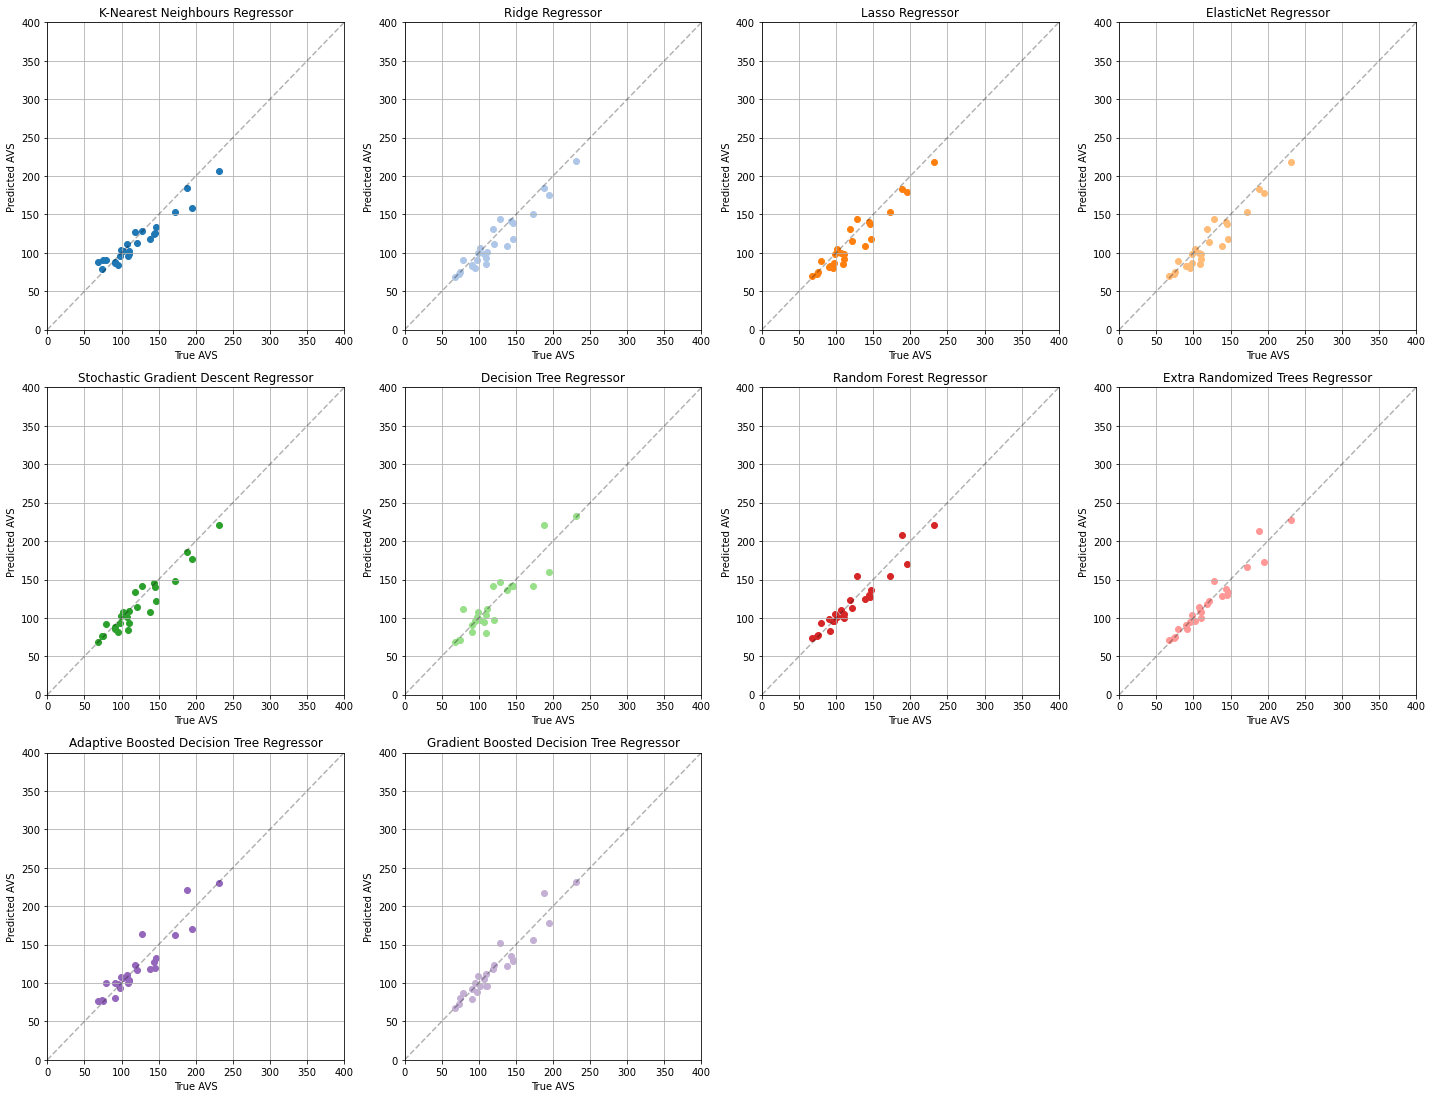


-> 회귀모형분석 표:


,Estimator,R2 Score,Explained Variance Score
0,K-Nearest Neighbours Regressor,0.870,0.891
1,Ridge Regressor,0.881,0.915
2,Lasso Regressor,0.885,0.921
3,ElasticNet Regressor,0.885,0.920
4,Stochastic Gradient Descent Regressor,0.889,0.909
5,Decision Tree Regressor,0.826,0.828
6,Random Forest Regressor,0.908,0.911
7,Extra Randomized Trees Regressor,0.940,0.941
8,Adaptive Boosted Decision Tree Regressor,0.860,0.861
9,Gradient Boosted Decision Tree Regressor,0.908,0.912


In [37]:
color=iter(plt.cm.tab20(np.linspace(0, 1, 20)))    
plt.figure(figsize=(20, 20))

regression_metrics = []

for imodel, model in enumerate(models):
    
    regressor      = model.estimator
    regressor_name = model.estimator_name
    
    print("-> ", regressor_name, "...")
    
    regressor.fit(X_train, y_train) # Fit

    y_prediction = regressor.predict(X_test) # Prediction
    
    model.set_y_prediction(y_prediction)

    y_truth = y_test.tolist()
    model.set_y_truth(y_truth)

    r2_s                 = r2_score(y_truth, y_prediction)
    explained_variance_s = explained_variance_score(y_truth, y_prediction)
    mean_squared_e       = mean_squared_error(y_truth, y_prediction)
    model.test_r2 = r2_s
    

    regression_metrics.append({
        'Estimator'                : regressor_name, 
        'R2 Score'                 : r2_s.round(3),
        'Explained Variance Score' : explained_variance_s.round(3),
    })

    plt.subplot(4, 4, imodel+1)

    plt.title(regressor_name)
    plt.xlabel("True AVS")
    plt.ylabel("Predicted AVS")
    plt.xlim(-0.05, 400)
    plt.ylim(-0.05, 400)
    plt.grid(True)
    plt.plot([0, 400], [0, 400], linestyle='--', color='black', alpha=.3)
    plt.scatter(y_truth, y_prediction, color=next(color))
    plt.tight_layout()
    

plt.show()

print("")
print("-> 회귀모형분석 표:")
columnorder = ['Estimator', 'R2 Score', 'Explained Variance Score']
df_regression_metrics = pd.DataFrame(regression_metrics, columns=columnorder)

display(df_regression_metrics)

### 회귀모델별 생활폐기물 배출량(톤/일)

In [20]:
data_index_dict = {}
data_index= [i]

for i in range(n_data_test):
    data_name = df_test.iat[i,1] # i행 0열 데이터 접근

    
for imodel, model in enumerate(models):
            
    name = ''.join(c for c in model.estimator_name if c.isupper()) # 약자 만들기
    column_name_score = '{} score'.format(name)

    regressor    = model.estimator
    y_prediction = model.y_prediction
    
    df_test[column_name_score] = y_prediction
    
    model.MSE = mean_squared_error(y_test, y_prediction)#, squared=False)
    
    


    sorted_data_score_dict = sorted(data_index_dict.items(), key=operator.itemgetter(1), reverse=True)
    

    
for i, (key, value) in enumerate(dict(sorted_data_score_dict).items(), 1):
    df_test =pd.merge(df_test, left_on=['생활폐기물 배출량(톤/일)'])    
    print()

In [21]:
df_test

,기간,지역,주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일),생활폐기물 배출량(톤/일),주민수(명),일반가구수,1인가구수,2인가구수,3인가구수,4인가구수,...,KNNR score,RR score,LR score,ENR score,SGDR score,DTR score,RFR score,ERTR score,ABDTR score,GBDTR score
0,2018,종로구,2.22,128.0,163026,63773,25326,15957,11241,8286,...,128.36,143.826,143.492,143.521,141.449,147.4,154.806,148.580,163.100,151.534
1,2018,중구,3.17,188.2,135633,53102,20803,14101,9601,6463,...,183.80,183.989,183.363,183.400,186.418,220.6,208.300,212.957,220.600,216.631
2,2018,용산구,1.18,95.4,245090,92500,34240,24574,17717,12098,...,84.54,80.229,80.569,80.552,81.193,96.5,96.231,95.312,98.626,99.642
3,2018,성동구,0.85,91.1,316463,123963,40706,32135,26002,19548,...,87.80,82.866,83.383,83.333,85.802,81.2,82.808,86.174,79.853,79.005
4,2018,광진구,0.92,79.2,371063,148735,56337,35093,28596,22354,...,91.16,90.209,89.948,89.964,92.372,111.9,93.767,85.203,100.077,86.495
5,2018,동대문구,1.14,110.4,364338,146974,55593,35628,27612,21139,...,102.62,100.514,98.456,98.591,108.654,111.9,105.329,107.433,102.875,95.638
6,2018,중랑구,0.96,110.2,408147,159444,49207,42934,34055,25381,...,98.10,92.668,92.623,92.628,93.930,104.3,99.739,99.309,104.362,96.674
7,2018,성북구,0.78,98.7,447687,171943,55136,42140,36301,29176,...,103.66,100.257,97.868,98.044,102.299,107.5,105.662,104.116,107.538,108.675
8,2018,강북구,0.71,75.2,322915,127551,40872,34781,26543,19222,...,91.24,74.953,74.483,74.509,76.016,71.2,77.116,74.977,76.450,80.414
9,2018,도봉구,0.75,67.6,341649,126286,30848,35343,30077,23237,...,87.86,68.312,69.501,69.412,67.997,68.1,73.367,70.872,76.089,67.562


In [22]:
MSLE = 0
selected_model = None
for model in models:
    selected_model = model
    MASLE = selected_model.MSLE
    print("MSLE= {}".format(selected_model.MSLE))

MSLE= 0.023163862007115267
MSLE= 0.016578851378762128
MSLE= 0.01825237003917773
MSLE= 0.018151660303596873
MSLE= 0.015457523488860127
MSLE= 0.017431889306341687
MSLE= 0.01166097651930247
MSLE= 0.012630123628059015
MSLE= 0.014249147307596249
MSLE= 0.012739156871227009


In [23]:
R2_tmp = 0
selected_model = None

for model in models:
    if model.test_r2 > R2_tmp:
        selected_model = model
        R2_tmp = selected_model.test_r2

In [24]:
selected_model.estimator_name

'Extra Randomized Trees Regressor'

In [25]:
selected_model.cv_r2

0.8900963232383269

In [26]:
selected_model.test_r2

0.9398568083118872

### 생활폐기물 배출량(톤/일) list (가장 좋은 회귀모형 이용)

In [27]:
score_column_names = []

both_column_names = []


name = ''.join(c for c in selected_model.estimator_name if c.isupper())
score_column_names.append("{} score".format(name))

both_column_names.append("{} score".format(name))


all_column_names = ['지역','주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)', '생활폐기물 배출량(톤/일)','주민수(명)']
all_column_names.extend(both_column_names)

df_awardcandidates = df_test.filter(all_column_names, axis=1)

df_test['Predicted 생활폐기물 배출량(톤/일)'] = df_awardcandidates[score_column_names]#.median(axis=1)


df_awardcandidates['생활폐기물 배출량(톤/일)' ] = df_awardcandidates[score_column_names]#.median(axis=1)


df_awardcandidates['생활폐기물 배출량(톤/일)'] = df_test['생활폐기물 배출량(톤/일)']


df_awardcandidates = df_awardcandidates.reset_index(drop=True)
df_awardcandidates.index = np.arange(1, len(df_awardcandidates) + 1)

print_limit = 26


df_awardcandidates = df_awardcandidates[:print_limit]
display(df_awardcandidates)

,지역,주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일),생활폐기물 배출량(톤/일),주민수(명),ERTR score
1,종로구,2.22,128.0,163026,148.580
2,중구,3.17,188.2,135633,212.957
3,용산구,1.18,95.4,245090,95.312
4,성동구,0.85,91.1,316463,86.174
5,광진구,0.92,79.2,371063,85.203
6,동대문구,1.14,110.4,364338,107.433
7,중랑구,0.96,110.2,408147,99.309
8,성북구,0.78,98.7,447687,104.116
9,강북구,0.71,75.2,322915,74.977
10,도봉구,0.75,67.6,341649,70.872


### Test year의 실제 생활폐기물 배출량(톤/일) 값과 예측 생활폐기물 배출량(톤/일) 값 비교

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from c

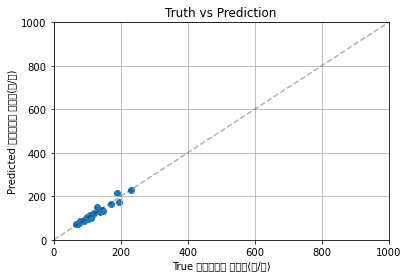

In [28]:
plt.title("Truth vs Prediction")
plt.xlabel('True 생활폐기물 배출량(톤/일)')
plt.ylabel('Predicted 생활폐기물 배출량(톤/일)')
plt.xlim(-0.05, 1000)
plt.ylim(-0.05, 1000)
plt.grid(True)
plt.plot([0, 10000], [0, 10000], linestyle='--', color='black', alpha=.3)
plt.scatter(df_test['생활폐기물 배출량(톤/일)'], df_test['Predicted 생활폐기물 배출량(톤/일)'])

## 결론



In [29]:
selected_model.MSLE

0.012630123628059015

In [30]:
data=df_test

In [31]:
data

,기간,지역,주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일),생활폐기물 배출량(톤/일),주민수(명),일반가구수,1인가구수,2인가구수,3인가구수,4인가구수,...,RR score,LR score,ENR score,SGDR score,DTR score,RFR score,ERTR score,ABDTR score,GBDTR score,Predicted 생활폐기물 배출량(톤/일)
0,2018,종로구,2.22,128.0,163026,63773,25326,15957,11241,8286,...,143.826,143.492,143.521,141.449,147.4,154.806,148.580,163.100,151.534,148.580
1,2018,중구,3.17,188.2,135633,53102,20803,14101,9601,6463,...,183.989,183.363,183.400,186.418,220.6,208.300,212.957,220.600,216.631,212.957
2,2018,용산구,1.18,95.4,245090,92500,34240,24574,17717,12098,...,80.229,80.569,80.552,81.193,96.5,96.231,95.312,98.626,99.642,95.312
3,2018,성동구,0.85,91.1,316463,123963,40706,32135,26002,19548,...,82.866,83.383,83.333,85.802,81.2,82.808,86.174,79.853,79.005,86.174
4,2018,광진구,0.92,79.2,371063,148735,56337,35093,28596,22354,...,90.209,89.948,89.964,92.372,111.9,93.767,85.203,100.077,86.495,85.203
5,2018,동대문구,1.14,110.4,364338,146974,55593,35628,27612,21139,...,100.514,98.456,98.591,108.654,111.9,105.329,107.433,102.875,95.638,107.433
6,2018,중랑구,0.96,110.2,408147,159444,49207,42934,34055,25381,...,92.668,92.623,92.628,93.930,104.3,99.739,99.309,104.362,96.674,99.309
7,2018,성북구,0.78,98.7,447687,171943,55136,42140,36301,29176,...,100.257,97.868,98.044,102.299,107.5,105.662,104.116,107.538,108.675,104.116
8,2018,강북구,0.71,75.2,322915,127551,40872,34781,26543,19222,...,74.953,74.483,74.509,76.016,71.2,77.116,74.977,76.450,80.414,74.977
9,2018,도봉구,0.75,67.6,341649,126286,30848,35343,30077,23237,...,68.312,69.501,69.412,67.997,68.1,73.367,70.872,76.089,67.562,70.872


In [32]:
df_test['생활폐기물 배출량(톤/일)']=df_test['Predicted 생활폐기물 배출량(톤/일)']
data.drop(['Predicted 생활폐기물 배출량(톤/일)'], axis=1, inplace=True)


In [33]:
data

,기간,지역,주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일),생활폐기물 배출량(톤/일),주민수(명),일반가구수,1인가구수,2인가구수,3인가구수,4인가구수,...,KNNR score,RR score,LR score,ENR score,SGDR score,DTR score,RFR score,ERTR score,ABDTR score,GBDTR score
0,2018,종로구,2.22,148.580,163026,63773,25326,15957,11241,8286,...,128.36,143.826,143.492,143.521,141.449,147.4,154.806,148.580,163.100,151.534
1,2018,중구,3.17,212.957,135633,53102,20803,14101,9601,6463,...,183.80,183.989,183.363,183.400,186.418,220.6,208.300,212.957,220.600,216.631
2,2018,용산구,1.18,95.312,245090,92500,34240,24574,17717,12098,...,84.54,80.229,80.569,80.552,81.193,96.5,96.231,95.312,98.626,99.642
3,2018,성동구,0.85,86.174,316463,123963,40706,32135,26002,19548,...,87.80,82.866,83.383,83.333,85.802,81.2,82.808,86.174,79.853,79.005
4,2018,광진구,0.92,85.203,371063,148735,56337,35093,28596,22354,...,91.16,90.209,89.948,89.964,92.372,111.9,93.767,85.203,100.077,86.495
5,2018,동대문구,1.14,107.433,364338,146974,55593,35628,27612,21139,...,102.62,100.514,98.456,98.591,108.654,111.9,105.329,107.433,102.875,95.638
6,2018,중랑구,0.96,99.309,408147,159444,49207,42934,34055,25381,...,98.10,92.668,92.623,92.628,93.930,104.3,99.739,99.309,104.362,96.674
7,2018,성북구,0.78,104.116,447687,171943,55136,42140,36301,29176,...,103.66,100.257,97.868,98.044,102.299,107.5,105.662,104.116,107.538,108.675
8,2018,강북구,0.71,74.977,322915,127551,40872,34781,26543,19222,...,91.24,74.953,74.483,74.509,76.016,71.2,77.116,74.977,76.450,80.414
9,2018,도봉구,0.75,70.872,341649,126286,30848,35343,30077,23237,...,87.86,68.312,69.501,69.412,67.997,68.1,73.367,70.872,76.089,67.562


In [34]:
data.to_csv('미래 생활폐기물 예측 2018.csv',index = None,encoding='cp949')

In [35]:
import csv 
import glob 
path = 'C:/Users/chaepacass/Desktop/졸플 쓰레기 수요 조사/' 
merge_path = 'C:/Users/chaepacass/Desktop/merges.csv' 

file_list = glob.glob(path + '*')
with open(merge_path, 'w') as f:
     for i, file in enumerate (file_list):
            if i ==0:
                with open(file, 'r') as f2:
                        while True:
                            line = f2.readline()
                            if not line:
                                break
                            f.write(line)
                file_name = file.split('\\')[-1] 
                print(file.split('\\')[-1] + ' write complete...')
            else: 
                with open(file, 'r') as f2: 
                        n = 0
                        while True: 
                            line = f2.readline()
                            if n!=0:
                                f.write(line)
                            if not line:
                                break
                            n+=1
                file_name= file.split('\\')[-1]
                print(file.split('\\')[-1] + ' write complete...')
print('>>> All file merge complete...')



                    



미래 생활폐기물 예측 2018.csv write complete...
서울시 주민 1인당 생활폐기물 2015-2017.csv write complete...
>>> All file merge complete...
